# IBM Data Science Capstone Project
### By Kevin Yi-Wei Lin 

## Introduction
In this project, I'm trying to predict road accidents before it happends, so the drivers can take precautions.

## Data
The data set used in this project came from SDOT GIS Seattle([Data Set](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv), [Meta Data](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)). It contains the speed, light, road condition, severity, etc. for the past road accidents. The idea is to use serveral supervised machine learning techniques to predict the severity given the various road conditions.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


### Download data

In [6]:
!wget -O dataset.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-18 14:58:46--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘dataset.csv’

100%[======================================>] 73,917,638  44.4MB/s   in 1.6s   

2020-08-18 14:58:47 (44.4 MB/s) - ‘dataset.csv’ saved [73917638/73917638]



In [52]:
df = pd.read_csv('dataset.csv')
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


### Check data

In [9]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [10]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [11]:
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [12]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [13]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [14]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

### Data cleaning
For the scope of this project, I'll look at how "SPEEDING", "ROADCOND", "LIGHTCOND", "WEATHER" parameters affect "SEVERITYCODE".  
Let's clean up the data.

In [53]:
df=df[["SEVERITYCODE", "ROADCOND","LIGHTCOND","WEATHER","SPEEDING"]]
df.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,SPEEDING
0,2,Wet,Daylight,Overcast,NaN
1,1,Wet,Dark - Street Lights On,Raining,NaN
2,1,Dry,Daylight,Overcast,NaN
3,1,Dry,Daylight,Clear,NaN
4,2,Wet,Daylight,Raining,NaN


Replace NaN in "Speeding" with "No"

In [54]:
df["SPEEDING"]=df["SPEEDING"].fillna("N")
df.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,SPEEDING
0,2,Wet,Daylight,Overcast,N
1,1,Wet,Dark - Street Lights On,Raining,N
2,1,Dry,Daylight,Overcast,N
3,1,Dry,Daylight,Clear,N
4,2,Wet,Daylight,Raining,N


Keep only weather in (Clear, Raining, Overcast), road condition in (Dry, Wet) and light condition in (Daylight, Dark - Street Lights On) so that the training set will not be too skewed.

In [57]:
df1=df[((df["WEATHER"]=="Clear") | (df["WEATHER"]=="Raining") | (df["WEATHER"]=="Overcast"))\
            & ((df["ROADCOND"]=="Dry")| (df["ROADCOND"]=="Wet"))\
            & ((df["LIGHTCOND"]=="Daylight") | (df["LIGHTCOND"]=="Dark - Street Lights On"))]
df1.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,SPEEDING
0,2,Wet,Daylight,Overcast,N
1,1,Wet,Dark - Street Lights On,Raining,N
2,1,Dry,Daylight,Overcast,N
3,1,Dry,Daylight,Clear,N
4,2,Wet,Daylight,Raining,N


In [58]:
df1["LIGHTCOND"].value_counts()

Daylight                   111293
Dark - Street Lights On     45420
Name: LIGHTCOND, dtype: int64

Since this is a binary classification problem, I'll use K-nearest neighbors and Logistic regression techniques.

# Methodology
Since this is a binary classification problem, I'll use K-nearest neighbors and Logistic regression techniques. KNN is chosen because it's performance on dealing with a large set of data. I also chose Logistic Regression because it provides the probablility for detecting accidents.

### Preprocessing and spliting training and test data set

Change the labels to numerical values

In [59]:
df1.replace(to_replace =["Clear"],  
                            value =0, inplace=True)
df1.replace(to_replace =["Raining"],  
                            value =1, inplace=True)
df1.replace(to_replace =["Overcast"],  
                            value =2, inplace=True)
df1.replace(to_replace =["Dry"],  
                            value =0, inplace=True)
df1.replace(to_replace =["Wet"],  
                            value =1, inplace=True)
df1.replace(to_replace =["Daylight"],  
                            value =0, inplace=True)
df1.replace(to_replace =["Dark - Street Lights On"],  
                            value =1, inplace=True)
df1.replace(to_replace =["N"],  
                            value =0, inplace=True)
df1.replace(to_replace =["Y"],  
                            value =1, inplace=True)
df1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,SPEEDING
0,2,1,0,2,0
1,1,1,1,1,0
2,1,0,0,2,0
3,1,0,0,0,0
4,2,1,0,1,0


In [61]:
df1.describe()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,SPEEDING
count,156713.000000,156713.000000,156713.000000,156713.000000,156713.000000
mean,1.329724,0.269123,0.289829,0.501630,0.050009
std,0.470114,0.443505,0.453684,0.749316,0.217963
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,1.000000,0.000000
max,2.000000,1.000000,1.000000,2.000000,1.000000


In [68]:
df1['SEVERITYCODE'].value_counts()

1    105041
2     51672
Name: SEVERITYCODE, dtype: int64

Get 5000 samples from each of the severity code to reduce training time

In [92]:
df_s1=df1[(df1["SEVERITYCODE"]==1)].sample(n=5000)
df_s2=df1[(df1["SEVERITYCODE"]==2)].sample(n=5000)
df2=pd.concat([df_s1,df_s2])
df2.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,SPEEDING
149913,1,1,1,1,0
30666,1,0,0,0,0
182871,1,0,0,0,0
78098,1,0,0,0,0
105647,1,0,0,0,0


In [93]:
X = df2[["ROADCOND", "LIGHTCOND", "WEATHER", "SPEEDING"]].values
y = df2["SEVERITYCODE"]

In [49]:
from sklearn import preprocessing

In [94]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 1.62,  1.61,  0.66, -0.23],
       [-0.62, -0.62, -0.67, -0.23],
       [-0.62, -0.62, -0.67, -0.23],
       [-0.62, -0.62, -0.67, -0.23],
       [-0.62, -0.62, -0.67, -0.23]])

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8000, 4) (8000,)
Test set: (2000, 4) (2000,)


### KNN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Find the best K value

In [96]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.51, 0.51, 0.51, 0.51, 0.5 , 0.51, 0.5 , 0.51, 0.51, 0.51, 0.51,
       0.51, 0.51, 0.51])

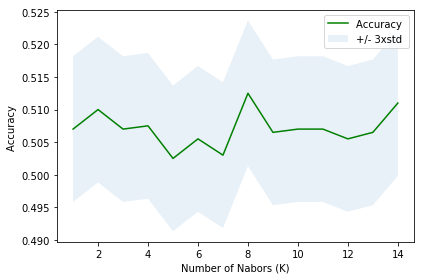

In [97]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [98]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5125 with k= 8


In [99]:
neigh = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
yhat_KNN=neigh.predict(X_test)

### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train,y_train)
yhat_LR = LR.predict(X_test)
yhat_LR_prob = LR.predict_proba(X_test)

In [113]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_LR)

0.5055

# Results

Let's look at the confusion matrices for both KNN and Logistic Regression techniques.

In [86]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### KNN

Confusion matrix, without normalization
[[294 704]
 [271 731]]


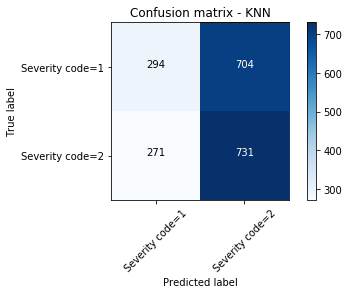

In [109]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity code=1','Severity code=2'],normalize= False,  title='Confusion matrix - KNN')

In [103]:
print(classification_report(y_test, yhat_KNN))

              precision    recall  f1-score   support

           1       0.52      0.29      0.38       998
           2       0.51      0.73      0.60      1002

   micro avg       0.51      0.51      0.51      2000
   macro avg       0.51      0.51      0.49      2000
weighted avg       0.51      0.51      0.49      2000



### Logistic Regression

Confusion matrix, without normalization
[[732 266]
 [723 279]]


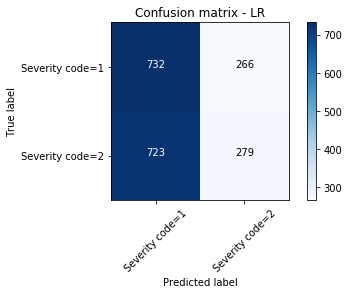

In [114]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Severity code=1','Severity code=2'],normalize= False,  title='Confusion matrix - LR')

In [105]:
print(classification_report(y_test, yhat_LR))

              precision    recall  f1-score   support

           1       0.50      0.73      0.60       998
           2       0.51      0.28      0.36      1002

   micro avg       0.51      0.51      0.51      2000
   macro avg       0.51      0.51      0.48      2000
weighted avg       0.51      0.51      0.48      2000



predicted probablity:

In [117]:
yhat_LR_prob[0:20]

array([[0.49, 0.51],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.51, 0.49],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.52, 0.48],
       [0.5 , 0.5 ],
       [0.5 , 0.5 ],
       [0.51, 0.49],
       [0.52, 0.48],
       [0.5 , 0.5 ]])

# Discussion
As shown by the KNN and LR confusion matrices, the KNN model biases toward severity code = 2 while the LR model biases toward severity code = 1. It appears that with only selected road condition, light condition, weather and speeding information is not enough for predicting the severity of accidents. A future direction will be to investigate the effects from location and day of the week on the severity.

# Conclusion
This project is an exercise to apply ML techniques on predicting car accident severity using the SDOT GIS Seattle data set. K-Nearest Neighbor and Logistic Regression classification techniques were used to predict the severity of the accident with recorded attributes, including road condition, light condition, weather and speeding. Each techniques is biased against one severity. To improve the models, attributes like location and day of the week can be further investigated.